#  Predicting Wine quality from a UCI machine learning repository Dataset 

### importing the files  into dataframes

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
red_wine=pd.read_csv("data/winequality-red.csv",sep=';')
white_wine=pd.read_csv("data/winequality-white.csv",sep=';')

# having a look at the dataframes 

print(red_wine.head(1))
print('\n')
red_wine.describe()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7            0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [2]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We are dealing only with numerical values , we can see the 11 features and the target variable : quality. For red wine : we have 1599 entries in all columns , there does not seem to be any missing data.The target value quality is in the range [3,8] for red wine . For the white wine , we have more datapoints : 4898 and a quality range of [3,9]. We also notice that we only have numerical features that take real values.

##### About duplicates:

Looking at the dataset for red_wine and white wine we notice that we have 240 duplicate for the red_wine set and 937 for the white one. It is true that a sample with duplicates will be biased towards them , but if they appear as part of a natural sampling then they do add more information and hence should be kept. Since there is no information about how the dataset samples were taken , we assume that we are in the second case and hence keep the duplicates.

In [3]:
print " number of duplicates in red wine:  "+str(np.sum(np.array(red_wine.duplicated())))
print " number of duplicates in white wine:  "+str(np.sum(np.array(white_wine.duplicated())))

 number of duplicates in red wine:  240
 number of duplicates in white wine:  937


## Number of examples with each target value for the two datasets.


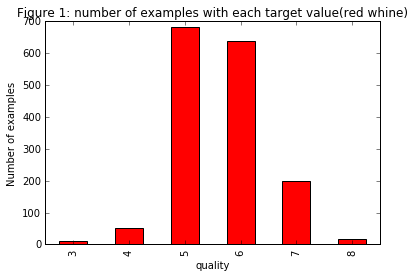

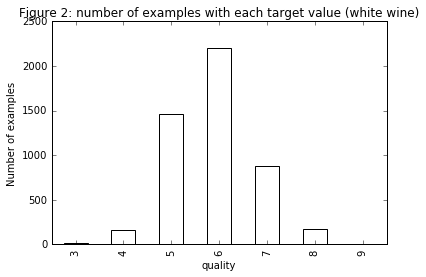

In [4]:

red_counts=red_wine.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 1: number of examples with each target value(red whine)')
red_counts.plot(kind='bar',color='r')
plt.show()

white_counts=white_wine.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 2: number of examples with each target value (white wine)')
white_counts.plot(kind='bar',color='w')
plt.show()

We notice that for both datasets follow a gaussian distribution with a mean  between 5 and 6, and with low variance since targets below 3 and above 8 are non existant. This will affect our analysis in the sense that it will be hard to predict a quality out of the ranges we have in our training set.

## First model: Linear regression.

mean square error:  0.465685986352


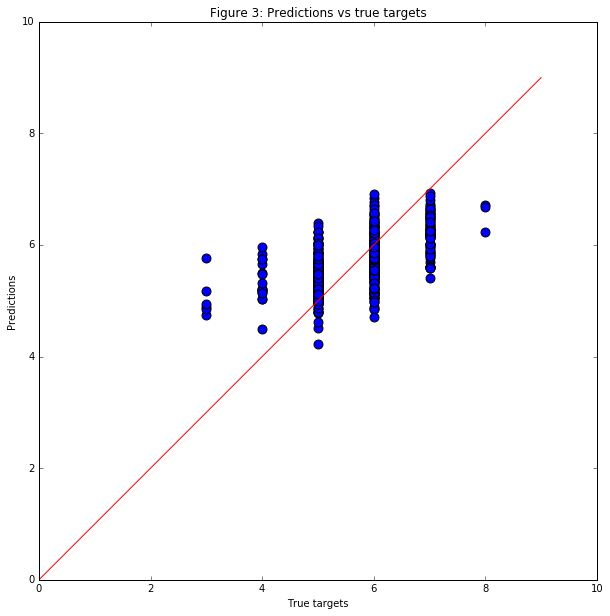

In [9]:
import warnings
warnings.filterwarnings('ignore')

## (a) Randomly splitting the data into a training and test set.

# shuffling indices.
n=len(red_wine)
split=n*0.7  # working with python 2.
indices=np.arange(n)
np.random.shuffle(indices)
# taking train data and test data

train_red=red_wine.iloc[indices[:split],:]
test_red=red_wine.iloc[indices[split:],:]


##  (b) Fitting a linear regression to the Data.

train_red_X=train_red.iloc[:,:-1].values
train_red_X=np.insert(train_red_X,0,1,axis=1)
train_red_t=train_red.iloc[:,-1:].values
red_w=np.linalg.inv(train_red_X.transpose().dot(train_red_X))\
.dot(train_red_X.transpose()).dot(train_red_t)

# taking X and t for test data and making predictions:
test_red_X=test_red.iloc[:,:-1].values
test_red_X=np.insert(test_red_X,0,1,axis=1)
test_red_t=test_red.iloc[:,-1:].values
predictions=test_red_X.dot(red_w)


## (c) Making a scatter plot of the predictions versus true targets.

plt.figure(figsize=(20,10))
plt.title('Figure 3: Predictions vs true targets')
plt.xlabel('True targets')
plt.ylabel('Predictions')     
plt.xlim(0,10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(test_red_t,predictions,s=80,marker='o')
plt.plot(np.arange(10),p.arange(10),color='r')

#Calculating and printing the squared mean error

mean_error= np.mean(np.square(predictions-test_red_t))
print "mean square error:  " +str(mean_error)


Since the quality ranges between 3 and 8 , we can propose such  a benchmark : if mean error < 10% * range then the value is good , otherwise the value is too high , then for each point in our predictions we can classify if it is an exact value if it rounds up to the target value , within benchmark if the difference between the prediction and the real value is less than 1 , and outside this difference if is more than 1. We notice in the plot bellow that most of the features fall within the benchmark proposed , and the the mean square error is les than range x 0.1=1 so the model is accepted with respect to the benchmark proposed.

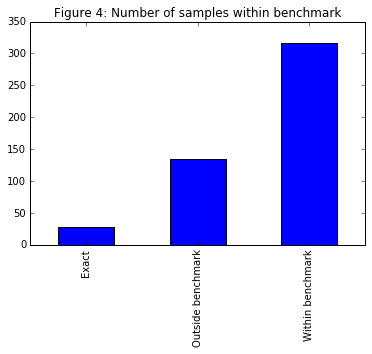

In [17]:
threshold=0.1*(max(test_red_t)-min(test_red_t))
Error_classes={}
Error_classes['Exact']=0
Error_classes['Within benchmark']=0
Error_classes['Outside benchmark']=0
def benchmark(error):
    if error<=threshold:
        return 1
    return 0
    
for i in range(len(predictions)):
    error=np.square(predictions[i][0]-test_red_t[i][0])
    if benchmark(error):
        if round(predictions[i],1)==test_red_t[i]:
            Error_classes['Exact']+=1
        else:
            Error_classes['Within benchmark']+=1
    else:
        Error_classes['Outside benchmark']+=1
Error_classes_serie=pd.Series(Error_classes)
plt.title('Figure 4: Number of samples within benchmark')
Error_classes_serie.plot(kind='bar',color='b')

## Regularized linear regression:

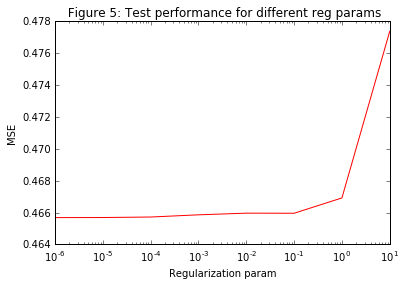

best MSE: 0.465686388893

best regularization parameter:1e-06


In [20]:
## Implementing regularized least squares and making a plot of test performance vs regularization parameter.

# By recomputing the loss when adding the regularization parameter : lambda*W'*W , when we derive the loss with
# respect to w and set the result to zero we obtain :  W=(X'*X+lambda*I)^-1 *X'*t.

def reg_linear_reg(X,t,lmbda):
    K=X.shape[1]
    I=np.identity(K)
    I[0][0]=0    # convention that we do not regularize parameter W0.
    return (np.linalg.inv(X.transpose().dot(X)+lmbda*I)\
        .dot(X.transpose()).dot(t))

# training regularized linear regression for different regularization
# parameters and calculating MSE.

lambdas=np.array([10**(i-6) for i in range(0,8)])
MSEs=[]
for lmbda in lambdas:
    red_wreg=reg_linear_reg(train_red_X,train_red_t,lmbda)
    predictions=test_red_X.dot(red_wreg)
    MSEs.append(np.mean(np.square(predictions-test_red_t)))
# Making a plot of MSE versus regularization parameter:
plt.xlabel("Regularization param")
plt.xscale('log')
plt.ylabel("MSE")
plt.title(' Figure 5: Test performance for different reg params')
plt.plot(lambdas,MSEs,color='r')
plt.show()
print "best MSE: "+str(np.min(MSEs))+"\n"
print "best regularization parameter:"+str(lambdas[np.argmin(MSEs)])


This is not a good way of determening the regularization parameter because if we only split the dataset in train set and test set and choose test set to compute lambda , then when we want to compute the test error our result will be biased since we already used the test set to choose lambda and we don't know if the model generalises well , so we can't compare different models.

best parameter:   0.0001


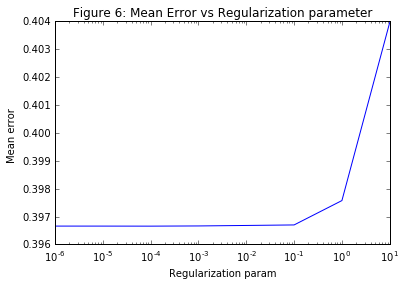

In [19]:
# 5.c Performing 10 fold cross validation and selecting best regularization parameter:

Nfold=10
N=train_red_X.shape[0]
folds=[int(N/Nfold) for i in range(Nfold)]
cfolds=np.cumsum(folds)
cfolds=np.insert(cfolds,0,0)
params=np.array([10**(i-6) for i in range(0,8)])
errors=[ [] for i in range(len(params))]
c=0
for param in params:
    for f in range(Nfold):
            trainX=train_red_X
            traint=train_red_t
            # remove test points 
            np.delete(trainX,range(cfolds[f],cfolds[f+1]),0)
            np.delete(traint,range(cfolds[f],cfolds[f+1]),0)
            # Creating test points:
            testX = train_red_X[cfolds[f]:cfolds[f+1]]
            testt = train_red_t[cfolds[f]:cfolds[f+1]]
            # training regularized linear regression and making preds
            wreg=reg_linear_reg(trainX,traint,param)
            preds=testX.dot(wreg)
            err=np.mean(np.square(preds-testt))
            errors[c].append(err)
    c+=1
    
mean_errors=[np.mean(error) for error in errors]  
index_min=np.argmin(mean_errors)
print("best parameter:   "+str(params[index_min]))

# Making a plot of MSE versus regularization parameter:
plt.title('Figure 6: Mean Error vs Regularization parameter')
plt.xlabel("Regularization param")
plt.xscale('log')
plt.ylabel("Mean error ")
#plt.title('Figure 5: cv error for different reg params')
plt.plot(params,mean_errors,color='b')
plt.show()


The least mean error corresponds to the lowest values of lambda which is close to 0 , we have the same mean square error after doing a regularized linear regression : to make sure it is the case we propose to plot train and test error bellow as a function of dataset size. So our model does not suffer from overfitting , and regularized linear regression is not the way to go.

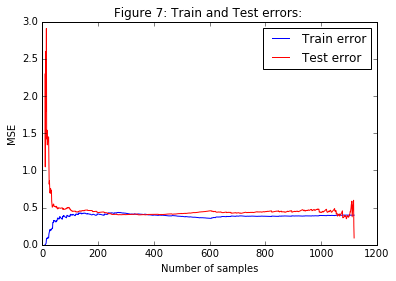

In [34]:
Error_train=[]
Error_test=[]
for m in np.arange(10,N):
    train_X_m=train_red_X[:m]
    train_t_m=train_red_t[:m]
    test_X_m=train_red_X[m:]
    test_t_m=train_red_t[m:]
    w_m=reg_linear_reg(train_X_m,train_t_m,10**(-6))
    preds_train=train_X_m.dot(w_m)
    preds_test=test_X_m.dot(w_m)
    Error_train.append(np.mean(np.square(preds_train-train_t_m)))
    Error_test.append(np.mean(np.square(preds_test-test_t_m)))
    
plt.title('Figure 7: Train and Test errors: ')
Train, =plt.plot(np.arange(10,N),Error_train,color='b',label='Train error')
Test, =plt.plot(np.arange(10,N),Error_test,color='r',label='Test error')
plt.ylabel('MSE')
plt.xlabel('Number of samples')
plt.legend(handles=[Train,Test])


    

##  Classification:
  
#### Limitation of  regression for this task : 

Looking at the quality values ( cell bellow ) we see that the target value quality takes values in the integer interval [3,8] , more of a categorical feature than a numerical one , so the task of predicting quality is more of a classification problem than a regression one , and linear regression is not the correct way to do it. 


#### Positive and negative feature of Naive Bayes with respect to this dataset:

Naive Bayes gives us the possibility of tweaking the results as we have probability of 
belonging to certain class ( probabilistic classifier) , and hence tweek the threshold depending on the exigence of clients. Naive Bayes is also a good choice because we don't have a large dataset so it is not computationnaly expensive to go with this approach. One negative feature of it is that we have to assume independence between different features which may not be true as some features can be strongly correlated : pH and fixed acidity for example.



#### Data pre-processing:

A good thing about Naive Bayes is that we do not need to perform feature scaling since we are calculating probabilities. But we have to pre-process our data to be able to calculate likelihood for each feature for each class : We have to first split dataset in classes ( dictionary in the code below) and then for each class take each feature and calculate the mean and standard deviation for that column. 

In [35]:
import math
from __future__ import division

# First we separate data by classes.

def separateByClass(dataset):  # takes a dataframe as input and separates data by class , returns dict.
    separated = {}
    for i in range(len(dataset)):
        vector = dataset.iloc[i,:]
        if (vector[-1] not in separated.keys()):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

# function to return mean and standard deviation for every attribute in dataset.
def summarize(dataset):
    summaries = [(np.mean(attribute), np.std(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classNumber, instances in separated.items():
        summaries[classNumber] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

# Naive Bayes assumption of independence between attributes permits to calculate probability of belonging
# to a class.
def calculateClassProbabilities(dataset, inputVector):
    summaries=summarizeByClass(dataset)
    probabilities = {}
    N=len(dataset)
    separated_dataset=separateByClass(dataset)
    for classNumber, classSummaries in summaries.items():
        probabilities[classNumber] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classNumber] *= calculateProbability(x, mean, stdev)
        probabilities[classNumber]*= (len(separated_dataset[classNumber]))/N
    return probabilities

def predict(dataset, inputVector):
    probabilities = calculateClassProbabilities(dataset, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability >= bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def makePredictions(dataset,testset):
    predictions=[]
    for inputVector in testset:
        prediction=predict(dataset,inputVector)
        predictions.append(prediction)
    return predictions
test_red_X2=test_red.iloc[:,:-1].values
predictions=makePredictions(train_red,test_red_X2)

In [36]:
quality_values=red_wine.groupby('quality').size()
print(quality_values)
        

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [37]:
#Accuracy of the classifier:
correct_preds=0
for i in range(len(predictions)):
    if predictions[i]==test_red_t[i]:
        correct_preds+=1
acc=correct_preds/len(test_red_t)
print "accuracy:  "+str(acc*100)+"%"

accuracy:  51.6666666667%


######  We have an accuracy of 51.67 % which is fairly good , since we have 6 classes and an absurd classifier that always predicts the same values would have an accuracy of 16.67% only. As a probabiistic classifier , Naive Bayes doesn't need any parameters tuning and no costy cross Validation. We could change the threshold (instead of 0.5 ) but that would depend on the application and is not related to the performance of the model. 

#### Displaying the Confusion Matrix.

In [223]:

predictions=np.array(predictions)
format_test_red_t=np.array([x[0] for x in test_red_t])
classes=[3,4,5,6,7,8]
Confusion_matrix=[[] for i in range(len(classes))]
for i in range(len(classes)):
    for j in range(len(classes)):
        Confusion_matrix[i].append(np.sum(np.all([predictions==classes[j],\
                                                  format_test_red_t==classes[i]],axis=0)))

    
# The predicted classes are on the columns , and the real classes are on the lines.    
Confusion_df=pd.DataFrame(Confusion_matrix,classes,classes)
print "Confusion Matrix:"+"\n"
Confusion_df

Confusion Matrix:



,3,4,5,6,7,8
3,0,2,2,0,0,0
4,0,4,12,4,0,0
5,1,5,138,50,5,0
6,0,5,62,86,34,0
7,0,0,4,28,33,1
8,0,0,0,0,4,0


A good performance matrix should be diagonal. It is not what we see in this case , so our classification is not very accurate. This comes back to the observation we made about the dataset in the first question , as we noticed it was a gaussian centered somewhere between 5 and 6 , which are the values that our algorithms predicts the most.



-> One step to improve the performance would be to gather more data especially for the classes bellow zero and above.


->For this particulare case , we chose a gaussian distribution to calculate the likelihood , we can try to find another distribution that better fits the dataset  of Naive Bayes.


->Since we assume that our features are independent , it is important to calculate the correlation between features and remove those who are redundant. 